In [1]:
import matplotlib.pylab as plt
import pandas as pd
import datetime as dt

# Data Analysis of Bike Sharing Dataset

In [2]:
# loading of original dataset
data = pd.read_csv('data/kaggle/train.csv', error_bad_lines=False)
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


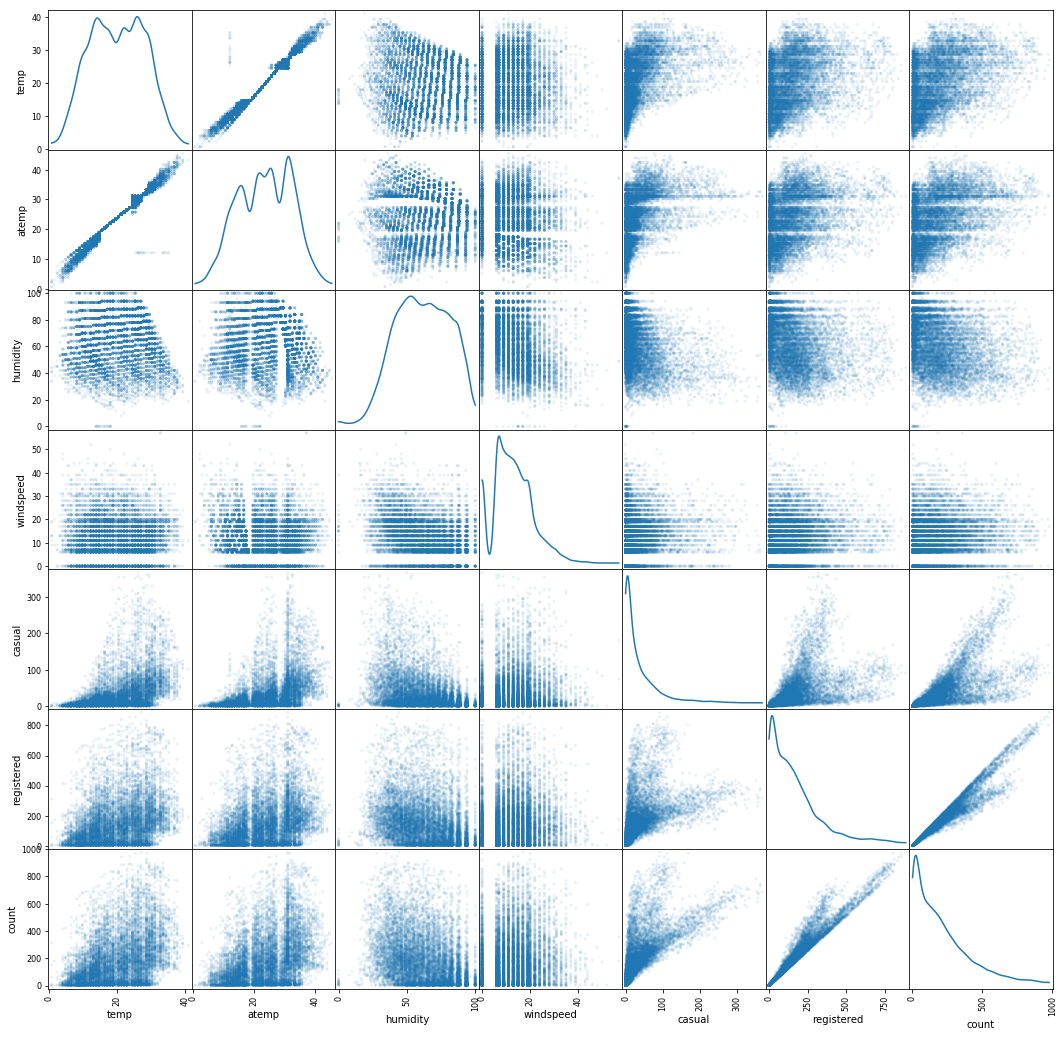

In [3]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['temp','atemp','humidity','windspeed','casual','registered','count']], alpha=0.1, figsize=(18, 18), diagonal='kde')
plt.show()

### Temperature vs Count

In [4]:
# add rounded temps
# in order to build histogram we need some chuncks (TODO replace with proper approach for histogram)
data.loc[:,'temp_rounded'] = round(data['temp'])
data.loc[:,'atemp_rounded'] = round(data['atemp'])

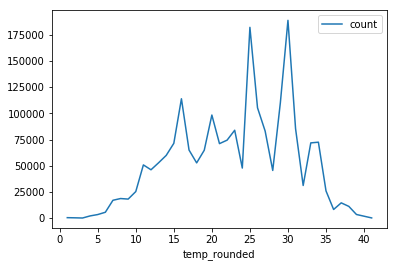

In [5]:
# temp vs count
data.groupby('temp_rounded').sum().reset_index().plot(x='temp_rounded',y='count')
plt.show()

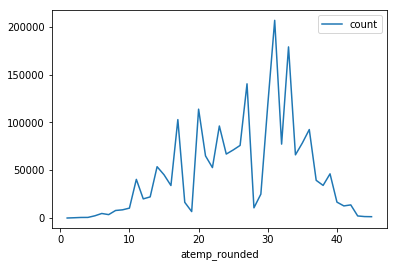

In [6]:
# atemp vs count
data.groupby('atemp_rounded').sum().reset_index().plot(x='atemp_rounded',y='count')
plt.show()

### Time measures vs Count

In [7]:
def to_date(str_date):
    return dt.datetime.strptime(str_date, '%Y-%m-%d %H:%M:%S')

def to_day_of_year(str_date):
    date = dt.datetime.strptime(str_date, '%Y-%m-%d %H:%M:%S')
    return date.toordinal() - dt.datetime(date.year, 1, 1).toordinal() + 1

def to_month_of_year(str_date):
    date = dt.datetime.strptime(str_date, '%Y-%m-%d %H:%M:%S')
    return date.month

def to_day_of_week(str_date):
    date = dt.datetime.strptime(str_date, '%Y-%m-%d %H:%M:%S')
    return date.weekday()

def to_year(str_date):
    date = dt.datetime.strptime(str_date, '%Y-%m-%d %H:%M:%S')
    return date.year

def to_hour(str_date):
    date = dt.datetime.strptime(str_date, '%Y-%m-%d %H:%M:%S')
    return date.hour

In [8]:
# add date features
data.loc[:,'month'] = data['datetime'].map(to_month_of_year)
data.loc[:,'day'] = data['datetime'].map(to_day_of_year)
data.loc[:,'weekday'] = data['datetime'].map(to_day_of_week)
data.loc[:,'hour'] = data['datetime'].map(to_hour)
data.loc[:,'year'] = data['datetime'].map(to_year)

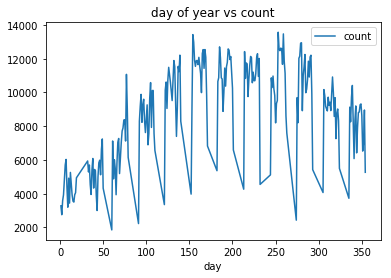

In [9]:
# day of year vs count
data.groupby(['day']).sum().reset_index().plot(x = 'day', y = 'count', title='day of year vs count')
plt.show()

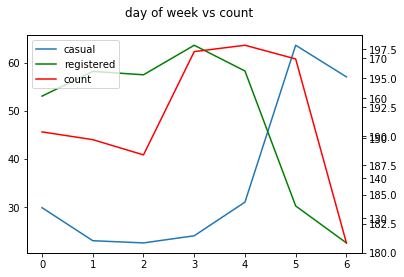

In [10]:
# day of week vs count
d = data.groupby('weekday').mean().reset_index()
fig = plt.figure()
ax1 = fig.add_subplot(111) # don't know what 111 stands for...
ax2 = ax1.twinx()
ax3 = ax1.twinx()
d.plot(ax=ax1, y='casual', legend=False)
d.plot(ax=ax2, y='registered', color='g', legend=False)
d.plot(ax=ax3, y='count', color='r', legend=False)
fig.legend(loc="upper left", bbox_to_anchor=(0,0,1,1), bbox_transform=ax1.transAxes)
fig.suptitle('day of week vs count')
plt.show()

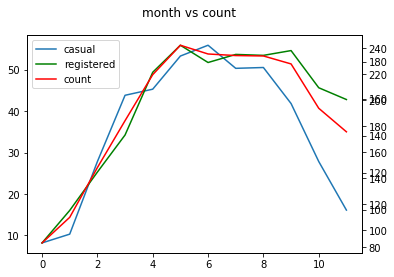

In [11]:
# month vs count
d = data.groupby('month').mean().reset_index()
fig = plt.figure()
ax1 = fig.add_subplot(111) # don't know what 111 stands for...
ax2 = ax1.twinx()
ax3 = ax1.twinx()
d.plot(ax=ax1, y='casual', legend=False)
d.plot(ax=ax2, y='registered', color='g', legend=False)
d.plot(ax=ax3, y='count', color='r', legend=False)
fig.legend(loc="upper left", bbox_to_anchor=(0,0,1,1), bbox_transform=ax1.transAxes)
fig.suptitle('month vs count')
plt.show()

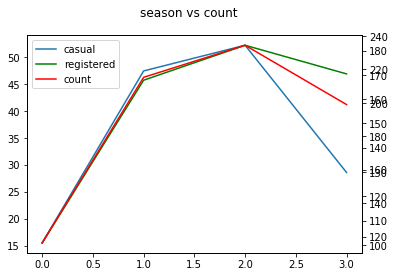

In [12]:
# season vs count
d = data.groupby('season').mean().reset_index()
fig = plt.figure()
ax1 = fig.add_subplot(111) # don't know what 111 stands for...
ax2 = ax1.twinx()
ax3 = ax1.twinx()
d.plot(ax=ax1, y='casual', legend=False)
d.plot(ax=ax2, y='registered', color='g', legend=False)
d.plot(ax=ax3, y='count', color='r', legend=False)
fig.legend(loc="upper left", bbox_to_anchor=(0,0,1,1), bbox_transform=ax1.transAxes)
fig.suptitle('season vs count')
plt.show()

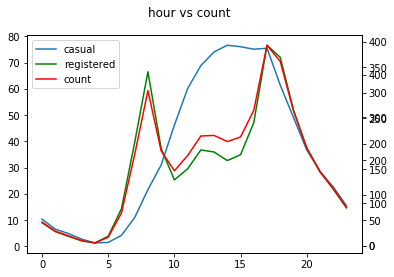

In [13]:
# hour vs count
d = data.groupby('hour').mean().reset_index()
fig = plt.figure()
ax1 = fig.add_subplot(111) # don't know what 111 stands for...
ax2 = ax1.twinx()
ax3 = ax1.twinx()
d.plot(ax=ax1, y='casual', legend=False)
d.plot(ax=ax2, y='registered', color='g', legend=False)
d.plot(ax=ax3, y='count', color='r', legend=False)
fig.legend(loc="upper left", bbox_to_anchor=(0,0,1,1), bbox_transform=ax1.transAxes)
fig.suptitle('hour vs count')
plt.show()

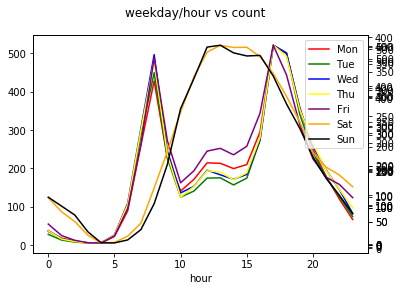

In [14]:
# weekday/hour vs count
d = data.groupby(['weekday','hour']).mean().reset_index()

fig = plt.figure()
# all axes
ax1 = fig.add_subplot(111) # don't know what 111 stands for...
axes = [ax1]
for i in range(1,7):
    axes += [ax1.twinx()]
# all colors
colors = ['red','green','blue','yellow','purple','orange','black']
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
for i in range(0,7):
    d[d['weekday']==i][['hour','count']].set_index('hour').plot(ax=axes[i],y='count',color=colors[i],label=labels[i],legend=False)
    
fig.legend(loc="upper right", bbox_to_anchor=(0,0,1,1), bbox_transform=ax1.transAxes)
fig.suptitle('weekday/hour vs count')
plt.show()

### Weather measures vs Count

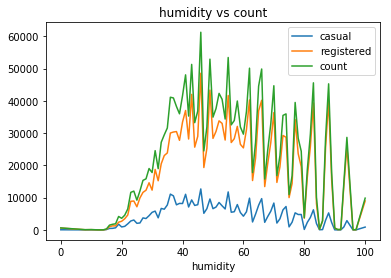

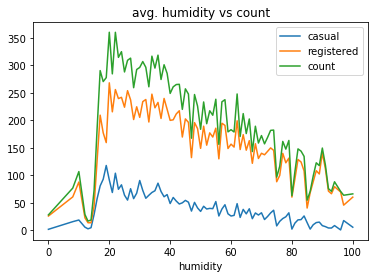

In [15]:
# humidity vs count
d = data[['humidity','casual','registered','count']]
d.groupby('humidity').sum().reset_index().plot(x='humidity', title='humidity vs count')
plt.show()

# humidity vs count
d.groupby('humidity').mean().reset_index().plot(x='humidity', title='avg. humidity vs count')
plt.show()

## Data Cleaning

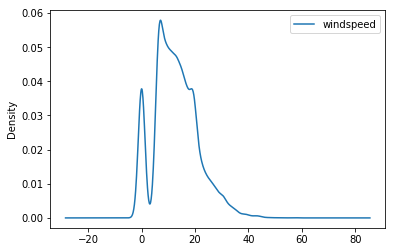

In [16]:
data[['windspeed']].plot.kde()
plt.show()

### Random Forest Classifier
replace zero-values using Random Forest Classifier as per the article [here](https://medium.com/@viveksrinivasan/how-to-finish-top-10-percentile-in-bike-sharing-demand-competition-in-kaggle-part-2-29e854aaab7d).

In [17]:
from sklearn.ensemble import RandomForestClassifier

wCol= ["season","weather","humidity","month","temp","year","atemp"]

dataWind0 = data[data["windspeed"]==0]
dataWindNot0 = data[data["windspeed"]!=0]
dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")

rfModel_wind = RandomForestClassifier()
rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0["windspeed"])
wind0Values = rfModel_wind.predict(X= dataWind0[wCol])
dataWind0["windspeed"] = wind0Values
data = dataWindNot0.append(dataWind0)
data["windspeed"] = data["windspeed"].astype("float")
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


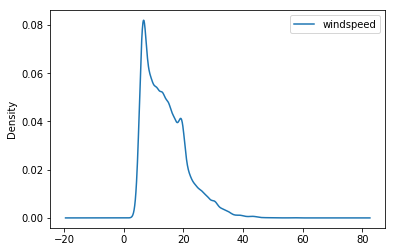

In [18]:
data[['windspeed']].plot.kde()
plt.show()

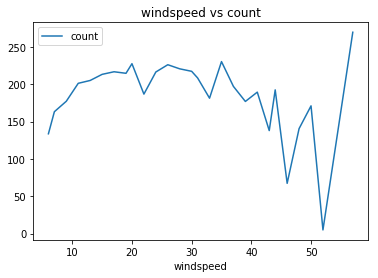

In [19]:
# windspeed vs count
data.groupby('windspeed').mean().reset_index().plot(x='windspeed',y='count',title='windspeed vs count')
plt.show()

## Add Features from Past

In [20]:
# highest correlations
c = data.corr()
c[abs(c['count'])>0.3]['count']

temp             0.394454
atemp            0.389784
humidity        -0.317371
casual           0.690414
registered       0.970948
count            1.000000
temp_rounded     0.394175
atemp_rounded    0.388972
hour             0.400601
Name: count, dtype: float64

Rounded temperature has lower correlation than its original values, so we don't need them as features:
- 0.394454 (temp)
- 0.394175 (temp_rounded)

and

- 0.389784 (atemp)
- 0.388972 (atemp_rounded)

when need to create a list of indexes

import numpy as np
np.linspace(.1, 1, num=9, retstep=True) 